In [1]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip install utils
!pip install pylabel > /dev/null

fatal: destination path 'yolov5' already exists and is not an empty directory.
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.2.4-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached pillow-11.1.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached scipy-1.15.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached torch-2.6.0-cp313-cp313-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached t

In [2]:
import torch
import os 
import random
import shutil
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import logging
import os 
import zipfile
import yaml
import PIL

from IPython.display import Image  # for displaying images
from sklearn.model_selection import train_test_split
from pylabel import importer
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw

logging.getLogger().setLevel(logging.CRITICAL)
random.seed(42)

In [3]:
from pylabel import importer

In [4]:
!cp -r ./ImageClassesCombinedWithCOCOAnnotations/images_raw/ ./

In [5]:
!cp -r ./ImageClassesCombinedWithCOCOAnnotations/coco_instances.json ./

In [6]:
!cp -r ./ImageClassesCombinedWithCOCOAnnotations/test_image.jpg ./

In [ ]:
path_to_annotations = r"./coco_instances.json"
path_to_images = r"./images_raw"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(5)

img_folder  img_filename img_path  img_id  img_width  img_height  \
id                                                                       
0   ./images_raw  00000000.jpg                0        300         300   
1   ./images_raw  00000001.jpg                1        300         300   
2   ./images_raw  00000001.jpg                1        300         300   
3   ./images_raw  00000001.jpg                1        300         300   
4   ./images_raw  00000002.jpg                2        300         300   

   img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  ann_iscrowd  \
id                                                        ...                
0                                   114.5          128.5  ...            0   
1                                    11.5          195.5  ...            0   
2                                   101.5           65.5  ...            0   
3                                    52.5          119.5  ...            0   
4                                    94.5           18.5  ...            0   

    ann_keypoints  ann_pose  ann_truncated  ann_difficult cat_id  cat_name  \
id                                                                           
0                                                              3   plastic   
1                                                              3   plastic   
2                                                              3   plastic   
3                                                              3   plastic   
4                                                              3   plastic   

   cat_supercategory split annotated  
id                                    
0               Bags               1  
1               Bags               1  
2               Bags               1  
3               Bags               1  
4               Bags               1  

[5 rows x 26 columns]

In [8]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 15000
Number of classes: 3
Classes:['garbage', 'paper', 'plastic']
Class counts:
cat_name
garbage    10062
paper       9967
plastic     9903
Name: count, dtype: int64
Path to annotations:
.


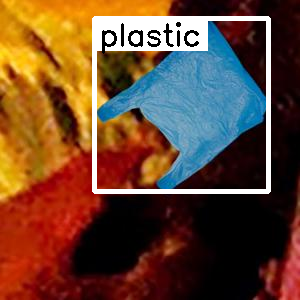

In [9]:
try:
    display(dataset.visualize.ShowBoundingBoxes(2))
    display(dataset.visualize.ShowBoundingBoxes("./images_raw/00000002.jpg"))
except:
    pass

In [10]:
dataset.path_to_annotations = "labels"
dataset.export.ExportToYoloV5(output_path='text_files');

Exporting YOLO files...: 100%|██████████| 15000/15000 [00:33<00:00, 454.28it/s]


In [11]:
# Note!!! Only run this code once
path = './text_files' #path of labels
labels = os.listdir(path)
for x in labels:
    lines = list()
    with open(path+"/"+x, "r+") as f:
        for line in f.read().splitlines():
            split_line = line.split(" ")  # split on space character (and remove newline characters as well)
            split_line[0] = str(
              int(split_line[0]) - 1)  # update the value inside the loop. the loop used in later not needed.
            lines.append(split_line)  # add split list into list of lines

    with open(path+"/"+x, 'w') as file:  # rewrite to file
        for line in lines:
            write_me = ' '.join(line)  # Use join method to add the element together
            file.write(write_me + "\n")

In [12]:
image_dir = r'./images_raw'
images = [os.path.join(image_dir, x) for x in os.listdir(image_dir)]
annotations = [os.path.join('./text_files', x) for x in os.listdir('./text_files') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [13]:
len(train_images),len(train_annotations)


(12000, 12000)

In [14]:
!mkdir images
!mkdir annotations
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

In [15]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

In [16]:
!mv annotations labels

In [17]:
shutil.move("./images", "./yolov5")

'./yolov5/images'

In [18]:
shutil.move("./labels", "./yolov5")

'./yolov5/labels'

In [19]:
yaml_params = {}
with open(r'dataset.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    yaml_file_list = yaml.load(file, Loader=yaml.FullLoader)
    yaml_params = yaml_file_list
    print(yaml_file_list)

{'names': ['garbage', 'paper', 'plastic'], 'nc': 3, 'path': '..', 'train': 'images', 'val': 'images'}


In [20]:
yaml_params['path'] = 'images'
yaml_params['train'] = 'train'
yaml_params['val'] = 'val'
yaml_params['test'] = 'test'
yaml_params

{'names': ['garbage', 'paper', 'plastic'],
 'nc': 3,
 'path': 'images',
 'train': 'train',
 'val': 'val',
 'test': 'test'}

In [21]:
with open(r'dataset.yaml', 'w') as file:
    documents = yaml.dump(yaml_params, file)

In [22]:
shutil.move("dataset.yaml", "yolov5/data")


'yolov5/data/dataset.yaml'

In [23]:
%cd ./yolov5


/home/albert/courseWork/yolov5


In [26]:
!python train.py --img 300 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 8 --epochs 20 --data dataset.yaml --weights yolov5s.pt --workers 4 --name yolo_bag_det --device cpu


train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=dataset.yaml, hyp=hyp.scratch-low.yaml, epochs=20, batch_size=8, imgsz=300, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=cpu, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=runs/train, name=yolo_bag_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-409-ge9ab205e Python-3.13.2 torch-2.6.0+cu124 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t